<a href="https://colab.research.google.com/github/jescalada/Tensorflow-colabs/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with neural networks in TensorFlow
There are many definitions for a regression problem. We will simplify to: Predicting a numerical variable based on a combination of other variables.

In [8]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


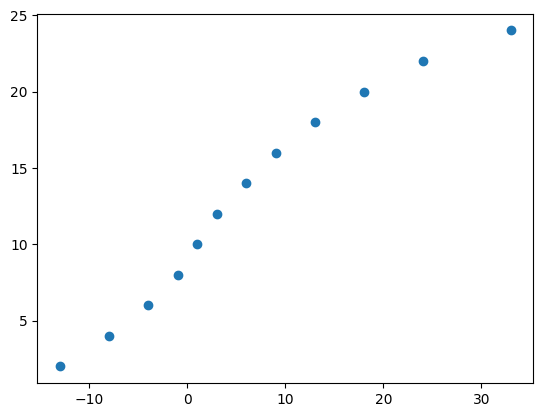

In [9]:
# Create some data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-13., -8., -4., -1., 1., 3., 6., 9., 13., 18., 24, 33])

# Create labels
y = np.array([2., 4., 6., 8., 10., 12., 14., 16., 18., 20., 22., 24.])

plt.scatter(X, y)

# Input and output shapes


In [10]:
# Create a demo tensor to predict the price of a house
house_info = tf.constant(["beds", "baths", "garages"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'beds', b'baths', b'garages'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

# Steps in modelling with TensorFlow
1. **Creating a model**: Define the input and output layers, as well as the hidden layers of the deep learning model
2. **Compiling the model**: Define the **loss function**, which tells the model how wrong it is, define the **optimizer** which tells the model how to improve the patterns, and define **evaluation metrics** in order to interpret the performance of the model itself
3. **Fitting the model**: Letting the model try to find patterns between X and Y (Features and labels)

In [11]:
# Set the random seed for reproducibility
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 [==============================] - 1s 753ms/step - loss: 11.7649 - mae: 11.7649
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2993 - mae: 11.2993
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.8337 - mae: 10.8337
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3681 - mae: 10.3681
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.9024 - mae: 9.9024
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4368 - mae: 9.4368
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 8.9712 - mae: 8.9712
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5056 - mae: 8.5056
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.0399 - mae: 8.0399
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 7.9369 - mae: 7.9369
Epoch 11/100
1/1 [==============================] - 0s 8ms/ste

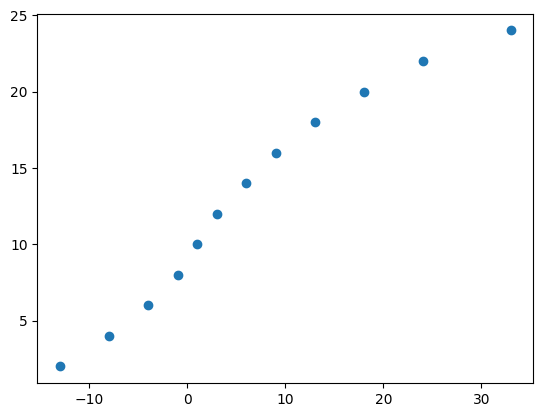

In [12]:
plt.scatter(X, y)

In [13]:
model.predict([22.])

1/1 [==============================] - 0s 114ms/step


array([[20.340408]], dtype=float32)

In [14]:
model.predict([24])

1/1 [==============================] - 0s 65ms/step


array([[22.116356]], dtype=float32)

1/1 [==============================] - 0s 44ms/step


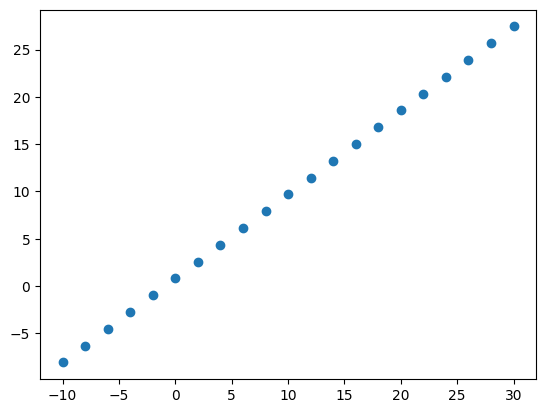

In [15]:
predictions1 = [(x, model.predict([x])) for x in range(-10, 32, 2)]
pairs = list(zip(*predictions1))
plt.scatter(pairs[0], pairs[1])

# Improving the model
Depends on the step: We can change various parameters.
1. Creation: Add more layers, increase the number of neurons, change the activation function of each layer
2. Compilation: Change the optimization function or learning rate of the optimization function
3. Fitting: Fit a model for more epochs, or more data (examples to learn from)

In [16]:
# 1. Create the new model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the new model
new_model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["mse"])

# 3. Fit the new model
new_model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 918ms/step - loss: 174.8589 - mse: 174.8589
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 51.5676 - mse: 51.5676
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 75.7369 - mse: 75.7369
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 62.4350 - mse: 62.4350
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 37.5971 - mse: 37.5971
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 40.7036 - mse: 40.7036
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 49.0821 - mse: 49.0821
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 50.1119 - mse: 50.1119
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 44.0248 - mse: 44.0248
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 35.8775 - mse: 35.8775
Epoch 11/100
1/1 [============================

1/1 [==============================] - 0s 43ms/step


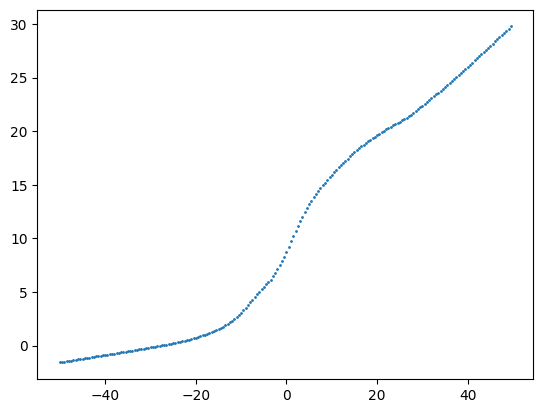

In [17]:
predictions2 = [(x, new_model.predict([x])) for x in np.arange(-50, 50, 0.5)]
pairs = list(zip(*predictions2))
plt.scatter(pairs[0], pairs[1], s=1)

In [18]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               200       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [44]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  plt.figure(figsize=(16, 9))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()

In [60]:
import math

# Generate pairs of x, y values in a sigmoid function (for predicting)
train_set = [(float(x), 1 / (1 + math.exp(-x))) for x in np.arange(-5, 5, 0.1)]
test_set = [(float(x), 1 / (1 + math.exp(-x))) for x in np.arange(5, 7.5, 0.1)]

x_train, y_train = zip(*train_set)
x_test, y_test = list(zip(*test_set))
print(list(x_train), list(y_train))


# 1. Create the new model
new_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

# 2. Compile the new model
new_model.compile(loss=tf.keras.losses.mean_squared_error,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                  metrics=["mae"])

# 3. Fit the new model
new_model.fit(tf.expand_dims(np.asarray(x_train), axis=-1), np.asarray(y_train), epochs=1000, verbose=0)

# 4. Evaluate the model
new_model.evaluate(x_test, y_test)

[-5.0, -4.9, -4.800000000000001, -4.700000000000001, -4.600000000000001, -4.500000000000002, -4.400000000000002, -4.3000000000000025, -4.200000000000003, -4.100000000000003, -4.0000000000000036, -3.900000000000004, -3.8000000000000043, -3.7000000000000046, -3.600000000000005, -3.5000000000000053, -3.4000000000000057, -3.300000000000006, -3.2000000000000064, -3.1000000000000068, -3.000000000000007, -2.9000000000000075, -2.800000000000008, -2.700000000000008, -2.6000000000000085, -2.500000000000009, -2.4000000000000092, -2.3000000000000096, -2.20000000000001, -2.1000000000000103, -2.0000000000000107, -1.900000000000011, -1.8000000000000114, -1.7000000000000117, -1.600000000000012, -1.5000000000000124, -1.4000000000000128, -1.3000000000000131, -1.2000000000000135, -1.1000000000000139, -1.0000000000000142, -0.9000000000000146, -0.8000000000000149, -0.7000000000000153, -0.6000000000000156, -0.500000000000016, -0.40000000000001634, -0.3000000000000167, -0.20000000000001705, -0.10000000000001

[0.0004047925758641213, 0.017722249031066895]

1/1 [==============================] - 0s 52ms/step
tf.Tensor(0.01772226, shape=(), dtype=float32)


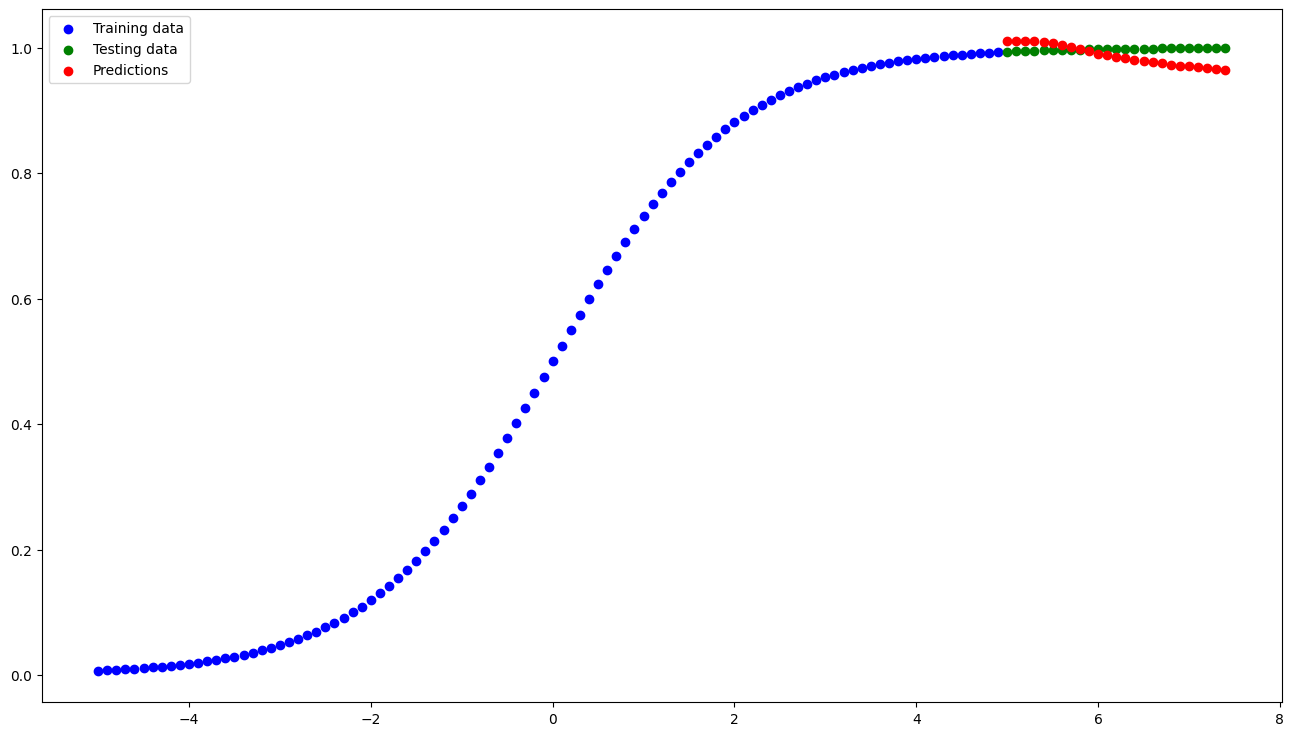

In [65]:
# 5. Generate predictions
y_pred = new_model.predict(x_test)

# 6. Plot the predictions
plot_predictions(x_train, y_train, x_test, y_test, y_pred)

# 7. Calculate the loss
loss = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
print(loss)